In [1]:
import pandas as pd
import numpy as np
import re
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Embedding, GRU

In [2]:
col_names = ['PID','Text_data','Label']
train_df = pd.read_csv("train.tsv", header=0, sep='\t', names=col_names)
dev_df = pd.read_csv("dev_with_labels.tsv", header=0, sep='\t', names=col_names)
vocab_size = 1024
max_length = 300
embedding_dim = 64
trunc_type = 'post'
# print(train_df)
# print(dev_df)
# print(test_df)

In [3]:
df_combined = pd.concat([train_df, dev_df])
df_combined = df_combined.drop_duplicates(subset=['Text_data'])
df_combined

,PID,Text_data,Label
0,train_pid_1,Waiting for my mind to have a breakdown once t...,moderate
1,train_pid_2,My new years resolution : I'm gonna get my ass...,moderate
2,train_pid_3,New year : Somone else Feeling like 2020 will ...,moderate
3,train_pid_4,"My story I guess : Hi, Im from Germany and my ...",moderate
4,train_pid_5,Sat in the dark and cried myself going into th...,moderate
...,...,...,...
4491,dev_pid_4492,Aren’t we all just tired? : I’ve been depresse...,severe
4492,dev_pid_4493,NEED HELP COPING : I had my life pretty much f...,severe
4493,dev_pid_4494,Qutting Zoloft Cold Turkey : I was on 75 mg se...,severe
4494,dev_pid_4495,Crying : I’m coming off my antidepressants and...,severe


In [4]:
# def cutText(pid):
#     return re.findall("\d+", pid)[0]

# train_df['PID'] = train_df['PID'].apply(cutText)
# dev_df['PID'] = dev_df['PID'].apply(cutText)
# #test_df['PID'] = test_df['PID'].apply(cutText)


# #train_df['Label'] = train_df['Label'].apply(reLabel)
# #dev_df['Label'] = dev_df['Label'].apply(reLabel)

# print(train_df)
# print(dev_df)
# print(test_df)
lengths = []
for i in df_combined['Text_data']:
    lengths.append(len(i))
print(np.average(lengths))
print(np.median(lengths))

845.0632315158435
509.0


In [5]:
# from gensim.parsing.preprocessing import remove_stopwords

# filtered_sentence = []

# for text in df_combined['Text_data']:
#     filtered_sentence.append(remove_stopwords(text))

# df_combined['Text_data'] = filtered_sentence

# lengths = []
# for i in df_combined['Text_data']:
#     lengths.append(len(i))
# print(np.average(lengths))
# print(np.median(lengths))

In [6]:
!pip install stop_words
from stop_words import get_stop_words
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = list(get_stop_words('en'))         #About 900 stopwords
nltk_words = list(stopwords.words('english')) #About 150 stopwords
stop_words.extend(nltk_words)

filtered_sentence = []

for text in df_combined['Text_data']:
    text =  ' '.join([word for word in text.split() if word not in stop_words])
    filtered_sentence.append(text)

df_combined['Text_data'] = filtered_sentence
lengths = []
for i in df_combined['Text_data']:
    lengths.append(len(i))
print(np.average(lengths))
print(np.median(lengths))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adars\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


572.3930916357408
349.0


In [7]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = "<OOV>")
tokenizer.fit_on_texts(df_combined['Text_data'])
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(df_combined['Text_data'])
padded = np.array(pad_sequences(sequences, padding = 'post', maxlen=max_length, truncating=trunc_type, value=0))

#train_sequences = tokenizer.texts_to_sequences(train_df['Text_data'])
train_padded, dev_padded, train_labels, dev_labels = train_test_split(padded, df_combined['Label'], test_size = 0.2)

# dev_sequences = tokenizer.texts_to_sequences(dev_df['Text_data'])
# dev_padded = np.array(pad_sequences(dev_sequences, padding = 'post', maxlen = max_length, truncating = trunc_type, value = 1))

# train_labels = np.array(train_df['Label']).astype('int32')
# dev_labels = np.array(dev_df['Label']).astype('int32')

word_index
#print(sequences)

{'<OOV>': 1,
 'i': 2,
 'like': 3,
 'feel': 4,
 "i'm": 5,
 'know': 6,
 'want': 7,
 'i’m': 8,
 'life': 9,
 'get': 10,
 'it': 11,
 'me': 12,
 'even': 13,
 'time': 14,
 'people': 15,
 'really': 16,
 'one': 17,
 'depression': 18,
 'don’t': 19,
 'friends': 20,
 'go': 21,
 'my': 22,
 'going': 23,
 'never': 24,
 'think': 25,
 'day': 26,
 'much': 27,
 'things': 28,
 "i've": 29,
 'help': 30,
 'this': 31,
 'years': 32,
 'anything': 33,
 'but': 34,
 'better': 35,
 'it’s': 36,
 'something': 37,
 'back': 38,
 'good': 39,
 'i’ve': 40,
 'make': 41,
 'always': 42,
 'everything': 43,
 'the': 44,
 'and': 45,
 'still': 46,
 'way': 47,
 'feeling': 48,
 'year': 49,
 'anymore': 50,
 'someone': 51,
 'nothing': 52,
 'anyone': 53,
 'school': 54,
 'got': 55,
 'work': 56,
 'see': 57,
 'now': 58,
 'happy': 59,
 'depressed': 60,
 'family': 61,
 'every': 62,
 'hate': 63,
 'need': 64,
 'talk': 65,
 'im': 66,
 'bad': 67,
 'so': 68,
 'fucking': 69,
 'love': 70,
 'can’t': 71,
 'myself': 72,
 'alone': 73,
 'everyone': 74

In [8]:
encoder = LabelBinarizer()
encoder.fit(df_combined['Label'])
y_train = encoder.transform(train_labels)
y_dev = encoder.transform(dev_labels)

In [9]:
print(y_dev)
print(train_padded)

[[1 0 0]
 [0 0 1]
 [1 0 0]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]
[[  1 199   2 ...   0   0   0]
 [  2 147 759 ...   0   0   0]
 [180   1  86 ...   0   0   0]
 ...
 [  1 240 174 ...   0   0   0]
 [  2   1   1 ...   0   0   0]
 [ 18 451   1 ...  21  56 519]]


In [10]:
np.unique(train_df['Label'])

array(['moderate', 'not depression', 'severe'], dtype=object)

In [11]:
from imblearn.over_sampling import SMOTE
from sklearn.utils import class_weight
smote = SMOTE(sampling_strategy='minority')
train_padded_s, y_train_s = smote.fit_resample(train_padded, y_train)
dev_padded_s, y_dev_s = smote.fit_resample(dev_padded, y_dev)
class_weights = class_weight.compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(train_labels),
                                        y = train_labels                                                    
                                    )
class_weights = dict(zip(np.unique(df_combined['Label']), class_weights)),
print(class_weights[0])

{'moderate': 0.6520069808027923, 'not depression': 0.8684332868433287, 'severe': 3.17687074829932}


In [12]:
class_weights = {0: 0.6463667820069204, 1: 0.8811320754716981, 2: 3.144781144781145}

In [17]:
model = tf.keras.Sequential([
    Embedding(vocab_size, embedding_dim, input_length = max_length, mask_zero = True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences = True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    Dense(3, activation = 'softmax')
])
model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(48, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(1e-4),metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 300, 64)           65536     
                                                                 
 bidirectional_2 (Bidirectio  (None, 300, 128)         66048     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 3)                

In [19]:
num_epochs = 10
history = model.fit(train_padded_s, y_train_s, epochs=num_epochs, validation_data=(dev_padded, y_dev))

Epoch 1/10
 25/247 [==>...........................] - ETA: 12:45 - loss: 1.0890 - accuracy: 0.3700

KeyboardInterrupt: 

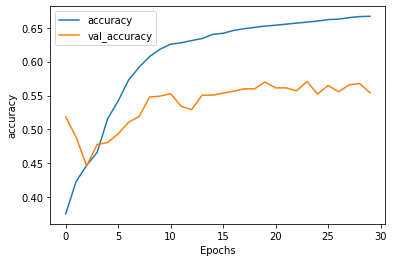

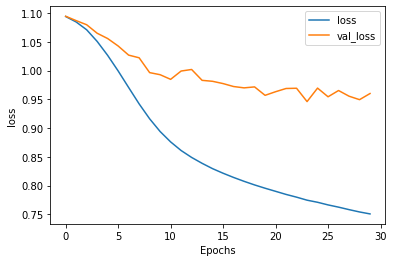

0.5542082738944365
[[469 190  99]
 [179 279  21]
 [ 89  47  29]]
                precision    recall  f1-score   support

not depression       0.62      0.64      0.63       737
      moderate       0.58      0.54      0.56       516
        severe       0.18      0.19      0.18       149

      accuracy                           0.55      1402
     macro avg       0.46      0.46      0.46      1402
  weighted avg       0.56      0.55      0.56      1402



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

dev_predictions = model.predict_on_batch(dev_padded)
#print(f1_score(dev_labels, dev_predictions, average=None))
dev_predictions = encoder.inverse_transform(dev_predictions)
print(accuracy_score(dev_predictions, dev_labels))
print(confusion_matrix(dev_predictions, dev_labels))
print(classification_report(dev_labels, dev_predictions, target_names=['not depression', 'moderate', 'severe']))

In [ ]:
test_df = pd.read_csv("test_data.tsv", header=0, sep='\t', names = ['pid', 'Text_data'])

filtered_sentence = []

for text in test_df['Text_data']:
    text =  ' '.join([word for word in text.split() if word not in stop_words])
    filtered_sentence.append(text)

test_df['Text_data'] = filtered_sentence

test_sequences = tokenizer.texts_to_sequences(test_df['Text_data'])
test_padded = np.array(pad_sequences(test_sequences, padding = 'post', maxlen = max_length, truncating = trunc_type))

predictions = model.predict_on_batch(test_padded)
predictions = encoder.inverse_transform(predictions)

In [ ]:
test_df['class_label'] = predictions
test_df

,pid,Text_data,class_label
0,test_pid_1,Im scared : This it. I lie every day say ill m...,severe
1,test_pid_2,New wanted vent : I finally realized I’m kind ...,moderate
2,test_pid_3,I’m sad : It’s kinda always issue. I wouldn’t ...,moderate
3,test_pid_4,Lonely alone. : All immediately family members...,severe
4,test_pid_5,This year trash. : I dont know I’m posting her...,moderate
...,...,...,...
3240,test_pid_3241,"Feeling lonely. : Hi reddit, I haven’t posted ...",moderate
3241,test_pid_3242,When suicide right? : So I got back hospital w...,severe
3242,test_pid_3243,Lowest I’ve ever ever. : To make long story sh...,moderate
3243,test_pid_3244,Does Toxoplasma Gondii ruined life ? (first pa...,moderate


In [ ]:
test_df = test_df.drop('Text_data', axis=1)
print(test_df)
test_df.to_csv('predictionsEmbedding30epochs.tsv', sep="\t")

                pid class_label
0        test_pid_1      severe
1        test_pid_2    moderate
2        test_pid_3    moderate
3        test_pid_4      severe
4        test_pid_5    moderate
...             ...         ...
3240  test_pid_3241    moderate
3241  test_pid_3242      severe
3242  test_pid_3243    moderate
3243  test_pid_3244    moderate
3244  test_pid_3245    moderate

[3245 rows x 2 columns]


In [ ]:
model.save("EmbeddingModel")

INFO:tensorflow:Assets written to: EmbeddingModel/assets


INFO:tensorflow:Assets written to: EmbeddingModel/assets
